## Observations and Insights 

**Observation 1:** Of our four most promising drug regimens it appears that Capomulin and Ramicone had the most consistent and favorable results. The final tumor volumes in the box plots appear to be consistently lower than the other two drugs considered promising. Capomulin and Ramicone also had lower IQRs which could indicate  smaller spread in their data sets then the other two drugs in this category.

**Observation 2:** To further prove the spread of Capomulin and Ramicone had consistent results, not only did they have lower IQRs than the other two promising drug regimens, they also had the two lowest variances and SEM of all drugs studied.

**Observation 3:** It is impressive that we had such consistency in the data for Capomulin and Ramicone as these drugs also had the most data points out of all drug regimens studied. This means we had the most observations of tumor volume for these drugs and the variance in results was still low. 

**Observation 4:** There appears to be a strong positive correlation between mouse weight and average tumor size, with a correlation coefficient of approxiately 0.84. This could imply a correlation between larger mouse weight and larger tuomr volume size. However, correlation does not prove causation so more studies would need to be run to prove this to be true.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
all_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID", how = "outer")
all_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
all_data["Mouse ID"].nunique()

249

In [3]:
all_data[all_data["Mouse ID"]== 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
all_data_group = all_data.groupby(["Mouse ID", "Timepoint"])
all_data_group = all_data_group.count()
all_data_group

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
a203     0                     1    1           1           1   
         5                     1    1           1           1   
         10                    1    1           1           1   
         15                    1    1           1           1   
         20                    1    1           1           1   
...                          ...  ...         ...         ...   
z969     25                    1    1           1           1   
         30                    1    1           1           1   
         35                    1    1           1           1   
         40                    1    1           1           1   
         45                    1    1           1           1   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
a203     0                           1                 1  
         5                           1                 1  
         10                          1                 1  
         15                          1                 1  
         20                          1                 1  
...                                ...               ...  
z969     25                          1                 1  
         30                          1                 1  
         35                          1                 1  
         40                          1                 1  
         45                          1                 1  

[1888 rows x 6 columns]

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
find_duplicate = all_data_group.loc[all_data_group["Drug Regimen"]!= 1]
find_duplicate

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     0                     2    2           2           2   
         5                     2    2           2           2   
         10                    2    2           2           2   
         15                    2    2           2           2   
         20                    2    2           2           2   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     0                           2                 2  
         5                           2                 2  
         10                          2                 2  
         15                          2                 2  
         20                          2                 2

In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#no_duplicates = all_data_group.loc[all_data_group["Drug Regimen"]== 1]

no_duplicates_df = all_data.loc[all_data["Mouse ID"]!="g989"]
no_duplicates_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
no_duplicates_df["Mouse ID"].nunique()

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_tumor_mean = no_duplicates_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
summary_tumor_median = no_duplicates_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
summary_tumor_var = no_duplicates_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
summary_tumor_std = no_duplicates_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
summary_tumor_SEM = no_duplicates_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
summary_tumor_df = pd.concat([summary_tumor_mean, summary_tumor_median, summary_tumor_var, summary_tumor_std,
                             summary_tumor_SEM], axis = 1)

summary_tumor_df.columns = ["Tumor Volume Mean", "Tumor Volume Median", "Tumor Volume Variance", 
                            "Tumor Volume Standard Deviation", "Tumor Volume SEM"]
summary_tumor_df
# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

## Bar Plots

Text(0, 0.5, 'Number of Data Points')

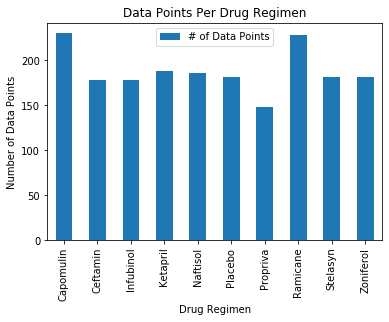

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
data_points = no_duplicates_df.groupby("Drug Regimen").count()["Mouse ID"]
data_points = pd.DataFrame(data_points)
data_points = data_points.rename(columns = {"Mouse ID": "# of Data Points"})
data_points_chart = data_points.plot(kind="bar", title="Data Points Per Drug Regimen")
data_points_chart.set_xlabel("Drug Regimen")
data_points_chart.set_ylabel("Number of Data Points")


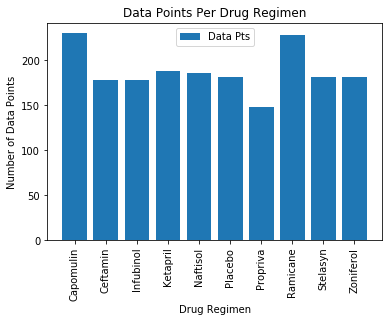

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
x_axis = np.arange(len(data_points["# of Data Points"]))
plt.bar(x_axis ,data_points["# of Data Points"], align = 'center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, data_points.index, rotation = "vertical")
plt.title("Data Points Per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.legend(["Data Pts"], loc = "best")

## Pie Plots

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

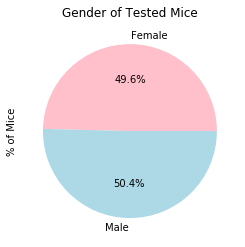

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
micefem = no_duplicates_df.loc[no_duplicates_df["Sex"] == "Female"]
micefem = micefem.nunique()['Mouse ID']
micemale = no_duplicates_df.loc[no_duplicates_df["Sex"] == "Male"]
micemale = micemale.nunique()['Mouse ID']
micefem
gender_df = pd.DataFrame({"Sex":["Female", "Male"], "Number of Mice":[micefem, micemale]})
gender_df = gender_df.set_index("Sex")
gender_df
gender_list = gender_df.keys()
gender_pie = gender_df.plot(kind = "pie", autopct='%.1f%%', colors = ["pink", "lightblue"], y=gender_list, legend = None, title=("Gender of Tested Mice"))
gender_pie.set_ylabel('% of Mice')
plt.tight_layout


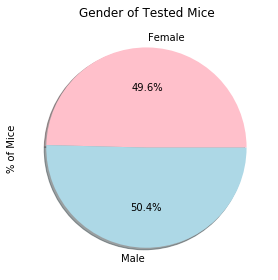

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = gender_df.index
sizes = gender_df["Number of Mice"]
colors = "pink", "lightblue"
plt.pie(sizes, labels=labels, colors = colors,
        autopct="%1.1f%%", shadow=True, startangle=0)
plt.title("Gender of Tested Mice")
plt.ylabel("% of Mice")
plt.tight_layout()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
#Capomulin, Ramicane, Infubinol, and Ceftamin.
outliers = no_duplicates_df.loc[(no_duplicates_df["Drug Regimen"]=="Capomulin")|(no_duplicates_df["Drug Regimen"]=="Ceftamin")|
                               (no_duplicates_df["Drug Regimen"]=="Ramicane")|(no_duplicates_df["Drug Regimen"]=="Infubinol")]
outliers_short = outliers[["Mouse ID","Drug Regimen","Timepoint", "Tumor Volume (mm3)"]]
final_tumor = outliers_short.groupby('Mouse ID').nth(-1)

#Capomulin Data
final_tumor_cap = final_tumor.loc[final_tumor["Drug Regimen"]=="Capomulin"]
final_tumor_cap = final_tumor_cap["Tumor Volume (mm3)"]
#Ramicane Data
final_tumor_ram = final_tumor.loc[final_tumor["Drug Regimen"]=="Ramicane"]
final_tumor_ram = final_tumor_ram["Tumor Volume (mm3)"]
#Ceftamin Data
final_tumor_cef = final_tumor.loc[final_tumor["Drug Regimen"]=="Ceftamin"]
final_tumor_cef = final_tumor_cef["Tumor Volume (mm3)"]
#Infubinol Data
final_tumor_inf = final_tumor.loc[final_tumor["Drug Regimen"]=="Infubinol"]
final_tumor_inf = final_tumor_inf["Tumor Volume (mm3)"]

#finding IQR for each Drug
iqr_cap = st.iqr(final_tumor_cap)
iqr_ram = st.iqr(final_tumor_ram)
iqr_cef = st.iqr(final_tumor_cef)
iqr_inf = st.iqr(final_tumor_inf)

print(f"The IQRs of the most promising treatment regimens are as follows:\n"
     f"Capomulin: {iqr_cap}\n"
     f"Ramicane: {iqr_ram}\n"
     f"Ceftamin: {iqr_cef}\n"
     f"Infubinol: {iqr_inf}")
print("")
#Finding Outliers for each drug
quartiles_cap = final_tumor_cap.quantile([.25,.5,.75])
lowerq_cap = quartiles_cap[0.25]
upperq_cap = quartiles_cap[0.75]
lower_bound_cap = lowerq_cap - (1.5*iqr_cap)
upper_bound_cap = upperq_cap + (1.5*iqr_cap)
outliers_cap = final_tumor_cap.loc[(final_tumor_cap>upper_bound_cap)|(final_tumor_cap<lower_bound_cap)]
if outliers_cap.empty:
    print("There are no outliers for Capomulin")
    print("")
else:
    print(f"The outliers for Capomulin data are:\n"
      f"{outliers_cap}")
    print("")

quartiles_inf = final_tumor_inf.quantile([.25,.5,.75])
lowerq_inf = quartiles_inf[0.25]
upperq_inf = quartiles_inf[0.75]
lower_bound_inf = lowerq_inf - (1.5*iqr_cap)
upper_bound_inf = upperq_inf + (1.5*iqr_cap)
outliers_inf = final_tumor_inf.loc[(final_tumor_inf>upper_bound_inf)|(final_tumor_inf<lower_bound_inf)]
if outliers_inf.empty:
    print("There are no outliers for Infubinol")
    print("")
else:
    print(f"The outliers for Infubinol data are:\n"
      f"{outliers_inf}")
    print("")

quartiles_ram = final_tumor_ram.quantile([.25,.5,.75])
lowerq_ram = quartiles_ram[0.25]
upperq_ram = quartiles_ram[0.75]
lower_bound_ram = lowerq_ram - (1.5*iqr_ram)
upper_bound_ram = upperq_ram + (1.5*iqr_ram)
outliers_ram = final_tumor_ram.loc[(final_tumor_ram>upper_bound_ram)|(final_tumor_ram<lower_bound_ram)]
if outliers_ram.empty:
    print("There are no outliers for Ramicane")
    print("")
else:
    print(f"The outliers for Ramicane data are:\n"
      f"{outliers_ram}")
    print("")

quartiles_cef = final_tumor_cef.quantile([.25,.5,.75])
lowerq_cef = quartiles_cef[0.25]
upperq_cef = quartiles_cef[0.75]
lower_bound_cef = lowerq_cef - (1.5*iqr_cef)
upper_bound_cef = upperq_cef + (1.5*iqr_cef)
outliers_cef = final_tumor_cef.loc[(final_tumor_cef>upper_bound_cef)|(final_tumor_cef<lower_bound_cef)]
if outliers_cef.empty:
    print("There are no outliers for Ceftamin")
else:
    print(f"The outliers for Ceftamin data are:\n"
      f"{outliers_cef}")
print("")


The IQRs of the most promising treatment regimens are as follows:
Capomulin: 7.781863460000004
Ramicane: 9.098536719999998
Ceftamin: 15.577752179999997
Infubinol: 11.477135160000003

There are no outliers for Capomulin

The outliers for Infubinol data are:
Mouse ID
c326    36.321346
Name: Tumor Volume (mm3), dtype: float64

There are no outliers for Ramicane

There are no outliers for Ceftamin



In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

#Data to plot
plot_data = [final_tumor_inf, final_tumor_cef, final_tumor_ram, final_tumor_cap]
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')

plt.title('Final Tumor Volume by Drug')
plt.ylabel('Volume (mm3)')
plt.boxplot(plot_data, flierprops = flierprops)
labels = ["Infubinol", "Ceftamin", "Ramicane", "Capomulin"]
plt.xticks([1,2,3,4], labels)


plt.show()



## Line and Scatter Plots

In [ ]:
cap = no_duplicates_df.loc[no_duplicates_df["Drug Regimen"]== "Capomulin"]
cap = cap.groupby("Mouse ID").max()["Drug Regimen"]
cap

In [ ]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_id = input("For which mouse listed above would you like data?" )
one_mouse = no_duplicates_df.loc[no_duplicates_df["Mouse ID"] == mouse_id]
one_mouse = one_mouse[["Timepoint", "Tumor Volume (mm3)"]]
timepoint = one_mouse["Timepoint"]
volume = one_mouse["Tumor Volume (mm3)"]
tumor_volume, = plt.plot(timepoint, volume,color="blue", linewidth=1, label="Volume of Tumor measured in mm3")
plt.legend(handles=[tumor_volume], loc="best")
plt.title(mouse_id + "'s Tumor Volume Change")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(True)
print(one_mouse)

In [ ]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capomulin = no_duplicates_df.loc[no_duplicates_df["Drug Regimen"] == "Capomulin"]
capomulin_group = capomulin.groupby("Mouse ID").mean()[["Weight (g)", "Tumor Volume (mm3)"]]
#capomulin_group_chart = capomulin_group[["Weight (g)"], ["Tumor Volume (mm3)"]]
capomulin_group.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', grid = True)
plt.title("Mouse Weight vs. Average Tumor Volume")
x = capomulin_group["Weight (g)"]
y = capomulin_group["Tumor Volume (mm3)"]
slope, intercept, r_value, p_value, std_err = st.linregress(x,y)
plt.plot(x, intercept + slope*x, "r", label = "line of best fit")

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x = capomulin_group["Weight (g)"]
y = capomulin_group["Tumor Volume (mm3)"]
slope, intercept, r_value, p_value, std_err = st.linregress(x,y)
print(f"correlation coefficient : {r_value}\n"
     f"linear regression model : y = {round(slope,2)}x + {round(intercept,2)}")